In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
from sklearn.metrics import roc_curve, auc
from scipy.stats import gaussian_kde
# from sklearn.cross_validation import train_test_split
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# from sklearn.linear_model import LogisticRegression
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers.embeddings import Embedding
# from keras.preprocessing import sequence

# from keras.layers import *
# np.random.seed()

In [4]:
import pandas as pd
# from keras.models import Model
# from keras.layers import Dense, Input, Dropout, MaxPooling1D, Conv1D
# from keras.layers import LSTM, Lambda
# from keras.layers import TimeDistributed, Bidirectional
# from keras.layers.normalization import BatchNormalization
# import numpy as np
# import tensorflow as tf
# import re
# import keras.callbacks
# import sys
# import os
# import pandas
# from keras import backend as K

In [5]:
import pandas as pd
import numpy as np
data =pd.read_csv('ALL_FEATURES_Q1+Q2 +Q3+Q4(Pass-fail).csv', low_memory=False, na_values= np.NaN) #FeatureSetTable
data.shape

(22437, 78)

In [6]:
data.columns

Index(['final_result', 'id_student', 'code_module', 'code_presentation',
       'gender', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'AC T. Clicks',
       'BC T. Clicks', 'AC DataPlus ', 'AC DualPane', 'AC External Quiz',
       'AC Folder', 'AC Forumng', 'AC Glossary', 'AC HomePage',
       'AC HtmlActivity', 'AC Oucollaborate', 'AC Oucontent',
       'AC Ouelluminate', 'AC Ouwiki', 'AC Page', 'AC Questionnaire',
       'AC Quiz', 'AC RepeatActivity', 'AC Resource', 'AC SharedSubPage',
       'AC SubPage', 'AC Url', 'TC_ACTIVITY', 'BC Glossary', 'BC DataPlus',
       'BC DualPane', 'BC ExternalQuiz', 'BC Forumng', 'BC HomePage',
       'BC HtmlActivity', 'BC Oucollaborate', 'BC Oucontent',
       'BC Ouelluminate', 'BC OUwiki', 'BC Page', 'BC Questionnaire',
       'BC Quiz', 'BC Resources', 'BC SharedSubPage', 'BC SubPage', 'BC Url',
       'ModuleAsigns', 'LateAsignsSub', 'PostA-1', 'PreA-1', 'OnAsClicks',


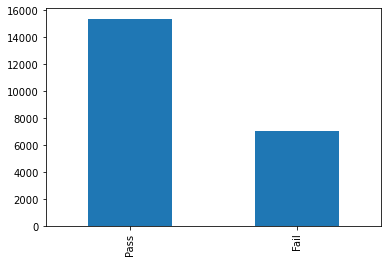

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
data["final_result"].value_counts().plot(kind="bar")

In [8]:
data.select_dtypes(include=["object"]).columns

Index(['final_result', 'code_module', 'code_presentation', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'disability'],
      dtype='object')

In [9]:
d=[ 'highest_education', 'disability', 'gender','final_result']

for val in d:
    labels,levels = pd.factorize(data[val])
    data[val] = labels

In [10]:
data=data.drop(['code_module', 'code_presentation','id_student', 'imd_band','age_band', 'region', 'AC T. Clicks',
       'BC T. Clicks', 'AC DataPlus ', 'AC DualPane', 'AC External Quiz',
       'AC Folder', 'AC Forumng', 'AC Glossary', 'AC HomePage',
       'AC HtmlActivity', 'AC Oucollaborate', 'AC Oucontent',
       'AC Ouelluminate', 'AC Ouwiki', 'AC Page', 'AC Questionnaire',
       'AC Quiz', 'AC RepeatActivity', 'AC Resource', 'AC SharedSubPage',
       'AC SubPage', 'AC Url', 'TC_ACTIVITY', 'BC Glossary', 'BC DataPlus',
       'BC DualPane', 'BC ExternalQuiz', 'BC Forumng', 'BC HomePage',
       'BC HtmlActivity', 'BC Oucollaborate', 'BC Oucontent',
       'BC Ouelluminate', 'BC OUwiki', 'BC Page', 'BC Questionnaire',
       'BC Quiz', 'BC Resources', 'BC SharedSubPage', 'BC SubPage', 'BC Url','ModuleAsigns',
       'LateAsignsSub', 'PostA-1', 'PreA-1', 'OnAsClicks', 'gender', 'highest_education', 'num_of_prev_attempts',
       'studied_credits', 'disability'], axis=1)

In [11]:
data.shape

(22437, 21)

In [12]:
#data=data.fillna(data.median(), inplace=True)
data=data.fillna(0)

In [13]:
data.head()

,final_result,Q1+Q2+Q3+Q4 DataPlus,Q1+Q2+Q3+Q4 DualPane,Q1+Q2+Q3+Q4 ExternalQuiz,Q1+Q2+Q3+Q4 Folder,Q1+Q2+Q3+Q4 Forumng,Q1+Q2+Q3+Q4 Glossary,Q1+Q2+Q3+Q4 HomePage,Q1+Q2+Q3+Q4 HtmlActivity,Q1+Q2+Q3+Q4 Oucollaborate,...,Q1+Q2+Q3+Q4 OuElluminate,Q1+Q2+Q3+Q4 Ouwiki,Q1+Q2+Q3+Q4 Page,Q1+Q2+Q3+Q4 Questionnaire,Q1+Q2+Q3+Q4 Quiz,Q1+Q2+Q3+Q4 RepeatActivity,Q1+Q2+Q3+Q4 Resource,Q1+Q2+Q3+Q4 SharedSubpage,Q1+Q2+Q3+Q4 Subpage,Q1+Q2+Q3+Q4 Url
0,0,0.0,0.0,0.0,0.0,191.0,0.0,131.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,86.0,0.0,236.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,14.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,372.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0
4,0,0.0,0.0,0.0,0.0,626.0,0.0,645.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,207.0,129.0


In [14]:
from sklearn import preprocessing
a=(data.iloc[:,1:21])
#a=data
#x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(a)
#df = pd.DataFrame(x_scaled,columns=data.columns)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00471365,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
X=x_scaled
X.shape
Y=data['final_result']


X=data.iloc[:,1:21]
Y=data['final_result']
X.shape



(22437, 20)

In [18]:
data.columns


Index(['final_result', 'Q1+Q2+Q3+Q4 DataPlus', 'Q1+Q2+Q3+Q4 DualPane',
       'Q1+Q2+Q3+Q4 ExternalQuiz', 'Q1+Q2+Q3+Q4 Folder', 'Q1+Q2+Q3+Q4 Forumng',
       'Q1+Q2+Q3+Q4 Glossary', 'Q1+Q2+Q3+Q4 HomePage',
       'Q1+Q2+Q3+Q4 HtmlActivity', 'Q1+Q2+Q3+Q4 Oucollaborate',
       'Q1+Q2+Q3+Q4 OuContent', 'Q1+Q2+Q3+Q4 OuElluminate',
       'Q1+Q2+Q3+Q4 Ouwiki', 'Q1+Q2+Q3+Q4 Page', 'Q1+Q2+Q3+Q4 Questionnaire',
       'Q1+Q2+Q3+Q4 Quiz', 'Q1+Q2+Q3+Q4 RepeatActivity',
       'Q1+Q2+Q3+Q4 Resource', 'Q1+Q2+Q3+Q4 SharedSubpage',
       'Q1+Q2+Q3+Q4 Subpage', 'Q1+Q2+Q3+Q4 Url'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=123)

In [24]:
!conda install keras

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.11.0             |   py37h89c1867_0         168 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    c-ares-1.17.1              |       h36c2

In [ ]:
import keras

In [21]:
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))



# record history of training
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.accuracies.append(logs.get('acc'))


total = len(sys.argv)
cmdargs = str(sys.argv)

print ("Script name: %s" % str(sys.argv[0]))
checkpoint = None
if len(sys.argv) == 2:
    if os.path.exists(str(sys.argv[1])):
        print ("Checkpoint : %s" % str(sys.argv[1]))
        checkpoint = str(sys.argv[1])
        print("check point")


NameError: name 'keras' is not defined

In [22]:
model = Sequential()
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

if checkpoint:
    model.load_weights(checkpoint)

file_name = os.path.basename(sys.argv[0]).split('.')[0]
check_cb = keras.callbacks.ModelCheckpoint('tryANN/'+ file_name + '.{epoch:02d}-{val_loss:.2f}.hdf5',
                                           monitor='val_loss',
                                           verbose=0, save_best_only=True, mode='min')

history = LossHistory()
#keras.optimizers.RMSprop(lr=0.001)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',precision,recall, f1])

pandas.DataFrame(model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=34,
          epochs=60, shuffle=True, callbacks=[ check_cb, history]).history).to_csv("Q4-adam-7aug-PassFail.csv")

#history_1=(model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=100,epochs=50))
           
#print("RMSprop with 0.01 left")


NameError: name 'Sequential' is not defined

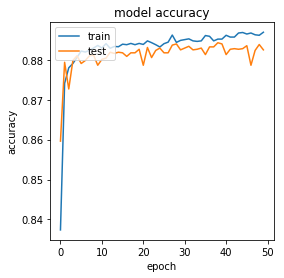

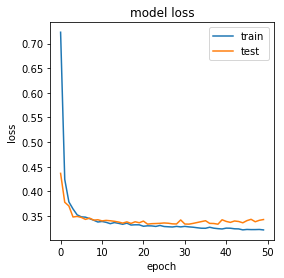

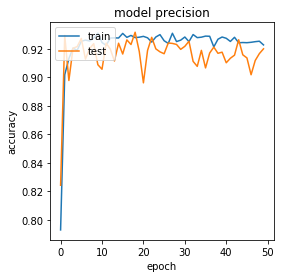

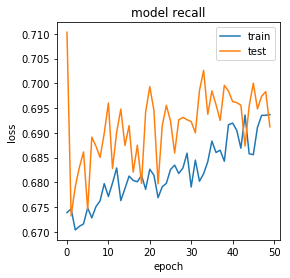

In [23]:
plt.figure(figsize=(4,4))
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(4,4))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.figure(figsize=(4,4))
plt.plot(history_1.history['precision'])
plt.plot(history_1.history['val_precision'])
plt.title('model precision')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(4,4))
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



In [ ]:
########################################################################################################################

In [25]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error

  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

print("Accuracy of sigmoid kernal: ", accuracy_score(y_test, y_pred))
loss=mean_squared_error(y_test, y_pred)
print("loss:", loss)

[[3931  638]
 [ 595 1568]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4569
           1       0.71      0.72      0.72      2163

    accuracy                           0.82      6732
   macro avg       0.79      0.79      0.79      6732
weighted avg       0.82      0.82      0.82      6732

Accuracy of sigmoid kernal:  0.8168449197860963
loss: 0.18315508021390375


In [27]:
from sklearn.linear_model import LogisticRegression
## Logistic regression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
#logit = sm.Logit(y_train,X_train)

predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print("LR-Score",score)

import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

print(classification_report(y_test, predictions))
loss=mean_squared_error(y_test, predictions)
print("loss:", loss)

LR-Score 0.8585858585858586
[[4231  338]
 [ 614 1549]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4569
           1       0.82      0.72      0.76      2163

    accuracy                           0.86      6732
   macro avg       0.85      0.82      0.83      6732
weighted avg       0.86      0.86      0.86      6732

loss: 0.1414141414141414


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
